# Portfolio with the Maximum Sharpe Ratios for the Oil & Gas Sector

In [1]:
import random
random.seed(3)

In [5]:
import pandas as pd
import numpy as np
import datetime as dt
import yfinance as yf
start = dt.datetime(2017,1,1).date()
end = dt.datetime(2021,1,1).date()

tickers= ['RELIANCE.NS', 'ONGC.NS', 'BPCL.NS', 'IOC.NS',
         'GAIL.NS', 'HINDPETRO.NS', 'IGL.NS', 'PETRONET.NS', 'GUJGASLTD.NS']

DF =pd.DataFrame()

for i in tickers:
    df = yf.download(i,start,end)[['Adj Close']].pct_change()
    df.columns = [i]                         
    DF = pd.concat([DF,df],axis =1)

df = DF.copy().round(5)
df

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


RELIANCE.NS  ONGC.NS  BPCL.NS   IOC.NS  GAIL.NS  HINDPETRO.NS  \
Date                                                                        
2017-01-02          NaN      NaN      NaN      NaN      NaN           NaN   
2017-01-03      0.00396  0.00130  0.01569  0.05436  0.01448       0.03178   
2017-01-04     -0.02042  0.01195  0.00753 -0.00666 -0.00294      -0.00722   
2017-01-05      0.00960  0.02490  0.02632  0.02799  0.00454       0.02603   
2017-01-06     -0.00227  0.01453 -0.01167 -0.01759  0.00090      -0.01321   
...                 ...      ...      ...      ...      ...           ...   
2020-12-24      0.02588  0.02588  0.00841  0.02382  0.01607       0.01593   
2020-12-28      0.00459  0.00698  0.01377  0.01607  0.02081       0.00725   
2020-12-29     -0.00661 -0.00693 -0.00327 -0.00545  0.00897       0.00093   
2020-12-30      0.00274  0.00107  0.00354 -0.00329 -0.00525       0.00487   
2020-12-31     -0.00511 -0.00214 -0.00457  0.00055  0.00122       0.00670   

             IGL.NS  PETRONET.NS  GUJGASLTD.NS  
Date                                            
2017-01-02      NaN          NaN           NaN  
2017-01-03  0.02942      0.02670       0.00896  
2017-01-04 -0.01194     -0.01510       0.00131  
2017-01-05 -0.00422      0.00867       0.00196  
2017-01-06 -0.00886     -0.01190      -0.01752  
...             ...          ...           ...  
2020-12-24  0.00102     -0.01125       0.03186  
2020-12-28  0.00184      0.02052      -0.00160  
2020-12-29  0.04295     -0.01652       0.01506  
2020-12-30 -0.01086     -0.00202       0.00381  
2020-12-31 -0.00633      0.00446      -0.01518  

[988 rows x 9 columns]

In [6]:
df_training = df[0:988]

In [7]:
df_training.tail()

RELIANCE.NS  ONGC.NS  BPCL.NS   IOC.NS  GAIL.NS  HINDPETRO.NS  \
Date                                                                        
2020-12-24      0.02588  0.02588  0.00841  0.02382  0.01607       0.01593   
2020-12-28      0.00459  0.00698  0.01377  0.01607  0.02081       0.00725   
2020-12-29     -0.00661 -0.00693 -0.00327 -0.00545  0.00897       0.00093   
2020-12-30      0.00274  0.00107  0.00354 -0.00329 -0.00525       0.00487   
2020-12-31     -0.00511 -0.00214 -0.00457  0.00055  0.00122       0.00670   

             IGL.NS  PETRONET.NS  GUJGASLTD.NS  
Date                                            
2020-12-24  0.00102     -0.01125       0.03186  
2020-12-28  0.00184      0.02052      -0.00160  
2020-12-29  0.04295     -0.01652       0.01506  
2020-12-30 -0.01086     -0.00202       0.00381  
2020-12-31 -0.00633      0.00446      -0.01518

In [8]:
mean_returns = df_training.mean() 
cov_matrix = df_training.cov()

print(mean_returns)
print(cov_matrix)

RELIANCE.NS     0.001558
ONGC.NS        -0.000304
BPCL.NS         0.000448
IOC.NS         -0.000150
GAIL.NS         0.000375
HINDPETRO.NS    0.000279
IGL.NS          0.001253
PETRONET.NS     0.000623
GUJGASLTD.NS    0.001512
dtype: float64
              RELIANCE.NS   ONGC.NS   BPCL.NS    IOC.NS   GAIL.NS  \
RELIANCE.NS      0.000424  0.000169  0.000172  0.000125  0.000136   
ONGC.NS          0.000169  0.000511  0.000253  0.000238  0.000254   
BPCL.NS          0.000172  0.000253  0.000647  0.000377  0.000253   
IOC.NS           0.000125  0.000238  0.000377  0.000439  0.000205   
GAIL.NS          0.000136  0.000254  0.000253  0.000205  0.000483   
HINDPETRO.NS     0.000170  0.000270  0.000547  0.000421  0.000258   
IGL.NS           0.000122  0.000133  0.000159  0.000106  0.000129   
PETRONET.NS      0.000089  0.000110  0.000131  0.000109  0.000148   
GUJGASLTD.NS     0.000082  0.000096  0.000109  0.000092  0.000082   

              HINDPETRO.NS    IGL.NS  PETRONET.NS  GUJGASLTD.NS  
REL

In [9]:
num_runs = 10000 # number of rows/iterations
result = np.zeros((num_runs,(len(tickers)+3)))
result

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [10]:
import random
random.seed(3)

In [11]:
for i in range(num_runs):
    
    # randomized weights
    weights = np.array(np.random.random(len(tickers))) 
    #Rebalance w/ constraints (SUM of all weights CANNOT BE > 1)
    weights = weights/np.sum(weights)
    
    portfolio_return = np.sum(mean_returns * weights)
    portfolio_return = portfolio_return * 252
    
    portfolio_std_dev = np.sqrt(np.dot(weights.T,np.dot(cov_matrix, weights)))
    portfolio_std_dev = portfolio_std_dev * np.sqrt(252)
    
    Sharpe = portfolio_return /  portfolio_std_dev
    
    # Populating the 'result' array with the required values: Mean, SD, Sharpe followed by the weights                   
    result[i,0] =  portfolio_return
    result[i,1] = portfolio_std_dev
    result[i,2] = Sharpe
    
    for j in range(len(tickers)):
        result[i,j+3]= weights[j]

In [12]:
result

array([[0.17777898, 0.23499896, 0.75650964, ..., 0.13558093, 0.13329012,
        0.11230025],
       [0.16527214, 0.22214289, 0.74399025, ..., 0.04551905, 0.22976494,
        0.13188007],
       [0.15697455, 0.25190326, 0.62315411, ..., 0.06590301, 0.02744417,
        0.10271425],
       ...,
       [0.1555029 , 0.23728597, 0.65533965, ..., 0.13693319, 0.03166167,
        0.08738433],
       [0.16660796, 0.22869046, 0.72853045, ..., 0.17579378, 0.15279985,
        0.09878327],
       [0.1136814 , 0.24653321, 0.46112001, ..., 0.05364742, 0.14049662,
        0.03445735]])

In [13]:
# Converting 'result' into a DataFrame
columns = ['mean','sd','Sharpe'] + tickers
columns

['mean',
 'sd',
 'Sharpe',
 'RELIANCE.NS',
 'ONGC.NS',
 'BPCL.NS',
 'IOC.NS',
 'GAIL.NS',
 'HINDPETRO.NS',
 'IGL.NS',
 'PETRONET.NS',
 'GUJGASLTD.NS']

In [14]:
result = pd.DataFrame(result,columns=columns)
result

mean        sd    Sharpe  RELIANCE.NS   ONGC.NS   BPCL.NS    IOC.NS  \
0     0.177779  0.234999  0.756510     0.088158  0.058088  0.138655  0.017847   
1     0.165272  0.222143  0.743990     0.113192  0.129936  0.196417  0.049683   
2     0.156975  0.251903  0.623154     0.169343  0.148467  0.165305  0.053436   
3     0.173230  0.227467  0.761563     0.180784  0.155091  0.135623  0.027374   
4     0.102534  0.243617  0.420884     0.057691  0.192151  0.077544  0.146218   
...        ...       ...       ...          ...       ...       ...       ...   
9995  0.163712  0.229291  0.713995     0.120932  0.091538  0.115884  0.065930   
9996  0.105942  0.276918  0.382575     0.005116  0.297191  0.291977  0.010577   
9997  0.155503  0.237286  0.655340     0.183049  0.140422  0.094392  0.196578   
9998  0.166608  0.228690  0.728530     0.085331  0.069441  0.153177  0.144466   
9999  0.113681  0.246533  0.461120     0.118368  0.206501  0.120822  0.075078   

       GAIL.NS  HINDPETRO.NS    IGL.NS  PETRONET.NS  GUJGASLTD.NS  
0     0.161044      0.155036  0.135581     0.133290      0.112300  
1     0.103121      0.000486  0.045519     0.229765      0.131880  
2     0.090703      0.176684  0.065903     0.027444      0.102714  
3     0.164920      0.049844  0.072659     0.105319      0.108386  
4     0.104430      0.146856  0.100073     0.120971      0.054066  
...        ...           ...       ...          ...           ...  
9995  0.176701      0.079465  0.164083     0.143356      0.042109  
9996  0.009963      0.156478  0.044700     0.008852      0.175146  
9997  0.023028      0.106551  0.136933     0.031662      0.087384  
9998  0.040895      0.079313  0.175794     0.152800      0.098783  
9999  0.102968      0.147661  0.053647     0.140497      0.034457  

[10000 rows x 12 columns]

In [15]:
result.shape

(10000, 12)

In [16]:
Max_Sharpe = result.iloc[result['Sharpe'].idxmax()]
print(Max_Sharpe)

mean            0.309655
sd              0.220881
Sharpe          1.401908
RELIANCE.NS     0.304666
ONGC.NS         0.006455
BPCL.NS         0.083126
IOC.NS          0.072592
GAIL.NS         0.016105
HINDPETRO.NS    0.005506
IGL.NS          0.197964
PETRONET.NS     0.000049
GUJGASLTD.NS    0.313537
Name: 5103, dtype: float64


In [17]:
Min_SD = result.iloc[result['sd'].idxmin()]
print(Min_SD)

mean            0.208143
sd              0.204662
Sharpe          1.017010
RELIANCE.NS     0.161330
ONGC.NS         0.087317
BPCL.NS         0.002287
IOC.NS          0.160022
GAIL.NS         0.039375
HINDPETRO.NS    0.021499
IGL.NS          0.122645
PETRONET.NS     0.183955
GUJGASLTD.NS    0.221571
Name: 4028, dtype: float64


In [18]:
result.iloc[5395]

mean            0.198435
sd              0.224655
Sharpe          0.883288
RELIANCE.NS     0.189098
ONGC.NS         0.032900
BPCL.NS         0.083528
IOC.NS          0.083251
GAIL.NS         0.083798
HINDPETRO.NS    0.145209
IGL.NS          0.099312
PETRONET.NS     0.164505
GUJGASLTD.NS    0.118398
Name: 5395, dtype: float64

In [19]:
result.iloc[8632]

mean            0.228262
sd              0.218994
Sharpe          1.042322
RELIANCE.NS     0.116897
ONGC.NS         0.065326
BPCL.NS         0.074547
IOC.NS          0.004719
GAIL.NS         0.068333
HINDPETRO.NS    0.133840
IGL.NS          0.203308
PETRONET.NS     0.124176
GUJGASLTD.NS    0.208854
Name: 8632, dtype: float64

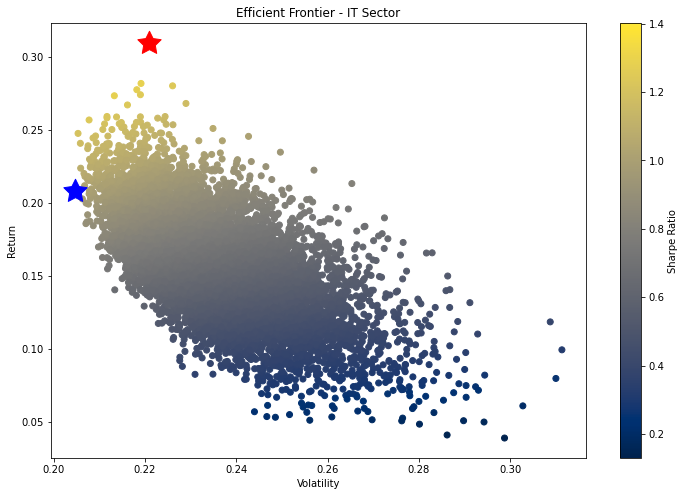

In [20]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize=(12,8))
plt.scatter(x=result['sd'],y=result['mean'],c=result['Sharpe'],cmap='cividis')
plt.colorbar(label='Sharpe Ratio')
plt.xlabel('Volatility')
plt.ylabel('Return')

plt.title('Efficient Frontier - IT Sector')
#Plot a red star to highlight position of the portfolio with highest Sharpe Ratio
plt.scatter(Max_Sharpe[1],Max_Sharpe[0],marker=(5,1,0),color='r',s=600)

#Plot a blue star to highlight position of the portfolio with minimum Variance
plt.scatter(Min_SD[1],Min_SD[0],marker=(5,1,0),color='b',s=600)
plt.show()